# Forcasting Solar Power supply

In [115]:
import pandas as pd
import numpy as np

dtype_dict = {
    'tsr': float,
    'ssr': float,
    't2m': float, 
}

df_all_weather = pd.read_csv('./datasets/Weather_Data_Germany.csv', dtype=dtype_dict)
df_all_weather.head()


,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
0,5.8,54.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,-2.766602,102439.914,766.03015,0.304399,11.806978,2.823900,282.04110,0.0,0.0,0.0,0.0,0.000860,15.666069,3.153420
1,5.8,53.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,-6.159180,102795.230,842.93190,0.945699,6.628730,1.767059,281.28223,0.0,0.0,0.0,0.0,0.254992,10.824787,2.401394
2,5.8,52.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,478.410160,103077.450,862.93030,0.999504,4.976940,1.899902,280.48530,0.0,0.0,0.0,0.0,0.439765,8.450895,2.586425
3,5.8,51.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,237.821290,103310.510,619.56150,0.999992,3.810944,1.201527,280.26593,0.0,0.0,0.0,0.0,0.645616,6.853557,1.614200
4,5.8,50.2,2019-01-01 00:00:00,2019-01-01 00:00:00,0.0,4681.780000,103456.680,385.46838,0.999992,3.689941,-0.424220,277.94235,0.0,0.0,0.0,0.0,0.361133,6.055728,-0.896704


In [116]:
file_path = './datasets/Realised_Supply_Germany.csv'

dtype_dict = {
    'Photovoltaic [MW]': float, 
}

df_all_supply = pd.read_csv(file_path, sep=';',decimal=',',thousands='.' )
df_all_supply.head()


,Date from,Date to,Biomass [MW],Hydro Power [MW],Wind Offshore [MW],Wind Onshore [MW],Photovoltaic [MW],Other Renewable [MW],Nuclear Power [MW],Lignite [MW],Coal [MW],Natural Gas [MW],Pumped Storage [MW],Other Conventional [MW]
0,01.01.19 00:00,01.01.19 00:15,1199.00,401.00,794.25,4839.25,0.0,31.5,2250.50,1733.00,836.25,850.50,87.50,431.75
1,01.01.19 00:15,01.01.19 00:30,1203.00,394.75,793.50,5030.75,0.0,31.5,2263.25,1587.75,729.50,821.50,99.25,429.75
2,01.01.19 00:30,01.01.19 00:45,1204.50,381.25,791.75,5213.50,0.0,31.5,2246.00,1555.25,648.50,804.75,44.00,431.25
3,01.01.19 00:45,01.01.19 01:00,1208.75,381.00,754.50,5308.25,0.0,31.5,2241.75,1459.00,597.50,796.50,41.00,431.50
4,01.01.19 01:00,01.01.19 01:15,1204.50,388.25,715.50,5398.50,0.0,31.5,2224.50,1367.75,610.50,765.50,21.00,429.25


In [117]:
import math
relevant_columns = ['time','tsr','ssr', 't2m']
df_sun = df_all_weather[relevant_columns].copy()




 # Make a copy to avoid the SettingWithCopyWarning
df_sun['time'] = pd.to_datetime(df_sun['time'], format='%Y-%m-%d %H:%M:%S')
#df_wind['time'] = df_wind['time'].dt.tz_localize('Europe/Berlin', ambiguous='NaT', nonexistent='NaT')
df_sun['year'] = df_sun['time'].dt.year
df_sun['month'] = df_sun['time'].dt.month
#df_sun['day'] = df_sun['time'].dt.day
df_sun['hour'] = df_sun['time'].dt.hour

df_sun['hour_sin'] = np.sin(2 * np.pi * df_sun['hour'] / 24)
df_sun['hour_cos'] = np.cos(2 * np.pi * df_sun['hour'] / 24)
df_sun['month_sin'] = np.sin(2 * np.pi * df_sun['month'] / 12)
df_sun['month_cos'] = np.cos(2 * np.pi * df_sun['month'] / 12)
df_sun.drop(columns=['month', 'hour'], inplace=True)
df_sun.head()
#df_wind.to_csv("here.csv", index=False)

,time,tsr,ssr,t2m,year,hour_sin,hour_cos,month_sin,month_cos
0,2019-01-01,0.0,0.0,282.04110,2019,0.0,1.0,0.5,0.866025
1,2019-01-01,0.0,0.0,281.28223,2019,0.0,1.0,0.5,0.866025
2,2019-01-01,0.0,0.0,280.48530,2019,0.0,1.0,0.5,0.866025
3,2019-01-01,0.0,0.0,280.26593,2019,0.0,1.0,0.5,0.866025
4,2019-01-01,0.0,0.0,277.94235,2019,0.0,1.0,0.5,0.866025


In [118]:
relevant_columns = ['Date from','Photovoltaic [MW]']
df_sun_supply = df_all_supply[relevant_columns].copy()



df_sun_supply['time'] = pd.to_datetime(df_sun_supply['Date from'], format='%d.%m.%y %H:%M')
#df_wind_supply['time'] = df_sun_supply['time'].dt.tz_localize('Europe/Berlin', ambiguous='NaT', nonexistent='NaT')
df_sun_supply['year'] = df_sun_supply['time'].dt.year
df_sun_supply['month'] =df_sun_supply['time'].dt.month
df_sun_supply['day'] = df_sun_supply['time'].dt.day
df_sun_supply['hour'] = df_sun_supply['time'].dt.hour
df_sun_supply.drop(columns=['Date from'], inplace=True)
df_sun_supply.head()

,Photovoltaic [MW],time,year,month,day,hour
0,0.0,2019-01-01 00:00:00,2019,1,1,0
1,0.0,2019-01-01 00:15:00,2019,1,1,0
2,0.0,2019-01-01 00:30:00,2019,1,1,0
3,0.0,2019-01-01 00:45:00,2019,1,1,0
4,0.0,2019-01-01 01:00:00,2019,1,1,1


In [119]:
def average_rows(group):
    first_timestamp = group['time'].iloc[0]
    averaged_data = group.drop(columns=['time']).mean()
    averaged_data['time'] = first_timestamp
    mw_data_points = group.drop(columns=['time']).values.tolist()
    return averaged_data    
#df_wind_supply['Photovoltaic [MW]'] = df_wind_supply['Photovoltaic [MW]'].str.replace('.', '').str.replace(',', '.').astype(float)


print("Length of groupings:", len(df_sun_supply.index // 4))
sun_supply_df = df_sun_supply.groupby(df_sun_supply.index // 4).apply(average_rows).reset_index(drop=True)

#TODO


df_sun_supply_dropped = sun_supply_df.drop(columns=['year', 'month', 'day', 'hour'])

df_merged = pd.merge(df_sun, df_sun_supply_dropped, on='time')
#df_merged.drop(columns=["Photovoltaic [MW]"], inplace=True)
#pd.options.display.max_columns = None  # Show all columns
#pd.options.display.max_rows = None  # Show all rows
pd.options.display.width = None  # Do not wrap columns
print(len(df_merged))
print(len(sun_supply_df))
df_merged.head()
# drop the first row, in order to shift everything backwards

Length of groupings: 140256
2805120
35064


,time,tsr,ssr,t2m,year,hour_sin,hour_cos,month_sin,month_cos,Photovoltaic [MW]
0,2019-01-01,0.0,0.0,282.04110,2019,0.0,1.0,0.5,0.866025,0.0
1,2019-01-01,0.0,0.0,281.28223,2019,0.0,1.0,0.5,0.866025,0.0
2,2019-01-01,0.0,0.0,280.48530,2019,0.0,1.0,0.5,0.866025,0.0
3,2019-01-01,0.0,0.0,280.26593,2019,0.0,1.0,0.5,0.866025,0.0
4,2019-01-01,0.0,0.0,277.94235,2019,0.0,1.0,0.5,0.866025,0.0


In [120]:
from tqdm import tqdm

df_sun_list_train = []
df_sun_list_test = []

values = []
row_counter = 0



for index, row in tqdm(df_merged.iterrows(), total=len(df_merged)):
    if row_counter == 0:
        for value in row.drop(["time","year"]).values:
            values.append(value)
    else:
        values.append(row["tsr"])
        values.append(row["ssr"])
  
    row_counter += 1

    if row_counter == 80:
        if row["year"] in [2020, 2019, 2021]:
            df_sun_list_train.append(values.copy())
        elif row["year"] == 2022:
            df_sun_list_test.append(values.copy())
        else:
            print("Year not in expected range.")

        values = []
        row_counter = 0
        
print(len(df_sun_list_train))
print(len(df_sun_list_test))
print(len(df_sun_list_train[0]))
df_merged.head()       

100%|██████████| 2805120/2805120 [00:58<00:00, 47714.52it/s]

26304
8760
166


,time,tsr,ssr,t2m,year,hour_sin,hour_cos,month_sin,month_cos,Photovoltaic [MW]
0,2019-01-01,0.0,0.0,282.04110,2019,0.0,1.0,0.5,0.866025,0.0
1,2019-01-01,0.0,0.0,281.28223,2019,0.0,1.0,0.5,0.866025,0.0
2,2019-01-01,0.0,0.0,280.48530,2019,0.0,1.0,0.5,0.866025,0.0
3,2019-01-01,0.0,0.0,280.26593,2019,0.0,1.0,0.5,0.866025,0.0
4,2019-01-01,0.0,0.0,277.94235,2019,0.0,1.0,0.5,0.866025,0.0


In [121]:
df_sun_supply_list_train = []
df_sun_supply_list_test = []

print(len(sun_supply_df))
for index, row in tqdm(sun_supply_df.iterrows(), total=len(sun_supply_df)):
    
    if float(row["year"]) in [2020.0, 2019.0,2021.0]:
        df_sun_supply_list_train.append(row['Photovoltaic [MW]'])
    elif float(row["year"]) in [2022.0]:
        df_sun_supply_list_test.append(row['Photovoltaic [MW]'])
    else:
        print("Row with unexpected year:", row["year"])


35064


100%|██████████| 35064/35064 [00:00<00:00, 40493.71it/s]


In [122]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K

class CustomSequential(tf.keras.Sequential):
    def predict_24(self, X):
        pass
    
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [123]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

import numpy as np


X_train = np.array(df_sun_list_train[:-1])

X_train_scaled = scaler.fit_transform(X_train)
y_train = np.array(df_sun_supply_list_train[1:])

X_test= np.array(df_sun_list_test[:-1])
X_test_scaled = scaler.fit_transform(X_test)
y_test = np.array(df_sun_supply_list_test[1:])

model_1 = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  
    layers.Dense(512, activation='relu'), 
    layers.Dense(256, activation='relu'), 
    layers.Dense(128, activation='relu'),  
    layers.Dense(64, activation='relu'),   
    layers.Dense(32, activation='relu'),   
    layers.Dense(1)  
])
model_1.compile(optimizer='adam',
              loss='mean_squared_error',  
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]) 

history = model_1.fit(X_train_scaled, y_train, epochs=33, batch_size=128)

test_loss, test_rmse = model_1.evaluate(X_test_scaled, y_test) 

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Mean Squared Error: {test_rmse:.4f}")




Epoch 1/33
206/206 [==============================] - 1s 3ms/step - loss: 2082839.6250 - rmse: 1443.2046
Epoch 2/33
206/206 [==============================] - 1s 3ms/step - loss: 55992.0547 - rmse: 236.6264
Epoch 3/33
206/206 [==============================] - 1s 3ms/step - loss: 37465.1328 - rmse: 193.5591
Epoch 4/33
206/206 [==============================] - 1s 3ms/step - loss: 33343.9492 - rmse: 182.6033
Epoch 5/33
206/206 [==============================] - 1s 3ms/step - loss: 28332.4863 - rmse: 168.3226
Epoch 6/33
206/206 [==============================] - 1s 3ms/step - loss: 23930.4531 - rmse: 154.6947
Epoch 7/33
206/206 [==============================] - 1s 3ms/step - loss: 22108.5391 - rmse: 148.6894
Epoch 8/33
206/206 [==============================] - 1s 3ms/step - loss: 20293.2871 - rmse: 142.4545
Epoch 9/33
206/206 [==============================] - 1s 3ms/step - loss: 18234.3262 - rmse: 135.0345
Epoch 10/33
206/206 [==============================] - 1s 3ms/step - loss: 1713

274/274 [==============================] - 0s 683us/step


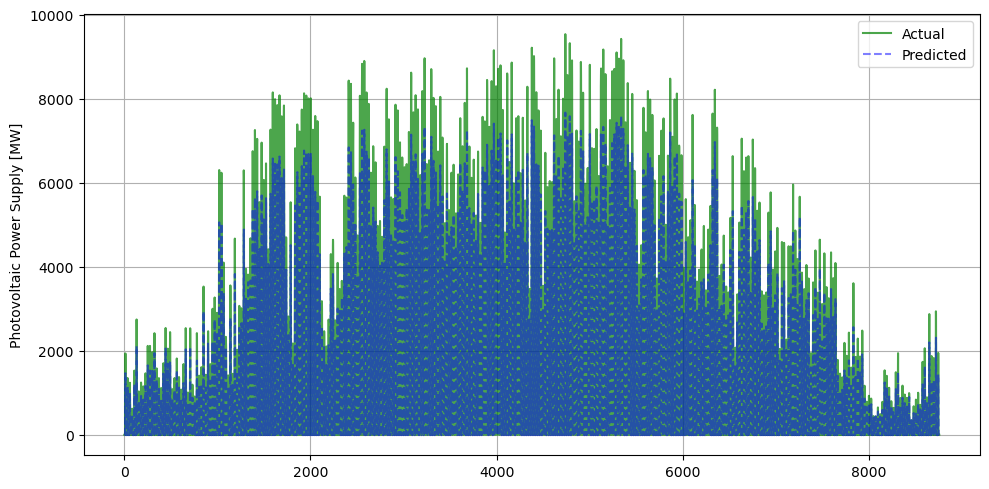

574.3229966228885


In [124]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
def myrooterror(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

y_pred = model_1.predict(X_test_scaled)

indices = range(len(y_pred))
y_test_first_10 = y_test
y_pred_first_10 = y_pred

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]


hourly_ticks = np.linspace(0, len(y_test_first_10)-1, len(months))


plt.figure(figsize=(10,5))
plt.plot(indices,y_test_first_10, linestyle='-', color='g',alpha=0.7,  label='Actual')
plt.plot(indices,y_pred_first_10,  linestyle='--', color='blue',alpha=0.5,  label='Predicted')

plt.ylabel('Photovoltaic Power Supply [MW]')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sun_power_supply.png', dpi=300)
plt.show()

rmse = np.sqrt(mean_squared_error(y_test_first_10,y_pred_first_10))
print(rmse)    

In [125]:
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Initialize lists to store RMSE values for plotting
rmse_values = []

# Define epoch and batch size options
epochs_options = list(range(5, 20))
batch_size_options = [32,64,128,256]

# Define different architectures to test
architectures = [
    [512, 256, 128, 64, 32],  # Original architecture
    [256, 128, 64, 32],       # Slightly smaller
    [512, 256, 128, 64],      # Remove one layer
    [1024, 512, 256, 128, 64], # Larger architecture
    [512, 256, 64],           # Fewer layers
    [512, 256, 32],
]

best_test_rmse = np.inf
best_epoch = None
best_batch_size = None
best_architecture = None
best_model = None

# Open the file once before the loop
with open('grid_search_results.txt', 'w') as f:
    f.write("Architecture\tEpochs\tBatch Size\tTest RMSE\n")  # Write the header

# Perform grid search
for architecture in architectures:
    for batch_size in batch_size_options:
        rmse_values = []
        for epochs in epochs_options:
            print(f"Training model with architecture {architecture}, {epochs} epochs and batch size of {batch_size}...")
            
            # Build the model for the current architecture
            model = keras.Sequential()
            model.add(layers.Input(shape=(X_train_scaled.shape[1],)))  # Input layer
            for units in architecture:
                model.add(layers.Dense(units, activation='relu'))  # Add each layer in the architecture
            model.add(layers.Dense(1))  # Output layer

            model.compile(optimizer='adam',
                          loss='mean_squared_error',  # Mean squared error for regression
                          metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

            model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

            # Evaluate on test data
            test_loss, test_rmse = model.evaluate(X_test_scaled, y_test, verbose=0)

            y_pred_hourly = model.predict(X_test_scaled)
            y_test_hourly = y_test
            rmse = np.sqrt(mean_squared_error(y_test_hourly, y_pred_hourly))
            rmse_values.append(rmse)  # Store RMSE for this epoch

            # Write the result to the file after each iteration
            with open('grid_search_results.txt', 'a') as f:
                f.write(f"{architecture}\t{epochs}\t{batch_size}\t{test_rmse:.4f}\n")

            # Check if this is the best model
            if rmse < best_test_rmse:
                best_test_rmse = rmse
                best_epoch = epochs
                best_batch_size = batch_size
                best_architecture = architecture
                best_model = model
                print(f"Update, new Best Test RMSE: {best_test_rmse:.4f} with architecture={best_architecture}, epochs={best_epoch} and batch_size={best_batch_size}")

        # Plot RMSE values by epochs and save the plot
        plt.plot(epochs_options, rmse_values, marker='o')
        plt.title(f'Test RMSE by Epochs with batch size {batch_size} and architecture {architecture}')
        plt.xlabel('Epochs')
        plt.ylabel('Test RMSE')
        plt.grid(True)
        
        # Save the plot with a descriptive filename
        plot_filename = f"rmse_epochs_batchsize_{batch_size}_architecture_{architecture}.png"
        plt.savefig(plot_filename)
        plt.close()  # Close the plot to free up memory

print(f"Best Test RMSE: {best_test_rmse:.4f} with architecture={best_architecture}, epochs={best_epoch}, and batch_size={best_batch_size}")
'''

'\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import mean_squared_error\nimport tensorflow as tf\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\n\n# Initialize lists to store RMSE values for plotting\nrmse_values = []\n\n# Define epoch and batch size options\nepochs_options = list(range(5, 20))\nbatch_size_options = [32,64,128,256]\n\n# Define different architectures to test\narchitectures = [\n    [512, 256, 128, 64, 32],  # Original architecture\n    [256, 128, 64, 32],       # Slightly smaller\n    [512, 256, 128, 64],      # Remove one layer\n    [1024, 512, 256, 128, 64], # Larger architecture\n    [512, 256, 64],           # Fewer layers\n    [512, 256, 32],\n]\n\nbest_test_rmse = np.inf\nbest_epoch = None\nbest_batch_size = None\nbest_architecture = None\nbest_model = None\n\n# Open the file once before the loop\nwith open(\'grid_search_results.txt\', \'w\') as f:\n    f.write("Architecture\tEpochs\tBatch Size\tTest RMSE\n")  # 

In [126]:
df_supply_list_24_train = []
df_supply_list_24_test = []
nna_count = 0
print(len(sun_supply_df))
for index, row in tqdm(sun_supply_df.iterrows(), total=len(sun_supply_df)):
    if float(row["year"]) in [2020.0, 2019.0,2021.0]:
        if index + 24 < len(sun_supply_df):
            df_supply_list_24_train.append(sun_supply_df['Photovoltaic [MW]'].iloc[index + 23])
    elif float(row["year"]) in [2022.0]:
        if index + 24 < len(sun_supply_df):
            df_supply_list_24_test.append(sun_supply_df['Photovoltaic [MW]'].iloc[index + 23])
    else:
        print("Row with unexpected year:", row["year"])


with open("24sun-y.txt", "w") as f:
    for item in df_supply_list_24_train:
        i =0
        f.write("%s\n" % item)

35064


100%|██████████| 35064/35064 [00:00<00:00, 43491.94it/s]


In [127]:
import numpy as np
import tensorflow as tf

'''
X_train_scaled = np.array(df_sun_list_train)
print(X_train_scaled.shape)
#X_train_scaled = scaler.fit_transform(X_train)
y_train = np.array(df_supply_list_24_train)
X_test_scaled= np.array(df_sun_list_test[:-24])
y_test = np.array(df_supply_list_24_test)
'''


X_train = np.array(df_sun_list_train)

X_train_scaled = scaler.fit_transform(X_train)
y_train = np.array(df_supply_list_24_train)

X_test= np.array(df_sun_list_test[:-24])
X_test_scaled = scaler.fit_transform(X_test)
y_test = np.array(df_supply_list_24_test)

model = CustomSequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with Leaky ReLU
])

model.compile(optimizer="adam",
              loss='mean_squared_error',  # Mean squared error for regression
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

history = model.fit(X_train_scaled, y_train, epochs=33, batch_size=128) 
test_loss, test_rmse = model.evaluate(X_test_scaled, y_test) 
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Root Mean Squared Error: {test_rmse:.4f}")


Epoch 1/33
206/206 [==============================] - 1s 3ms/step - loss: 2140735.0000 - rmse: 1463.1251
Epoch 2/33
206/206 [==============================] - 1s 3ms/step - loss: 315364.8750 - rmse: 561.5735
Epoch 3/33
206/206 [==============================] - 1s 3ms/step - loss: 288650.3750 - rmse: 537.2619
Epoch 4/33
206/206 [==============================] - 1s 3ms/step - loss: 288432.1250 - rmse: 537.0588
Epoch 5/33
206/206 [==============================] - 1s 3ms/step - loss: 270076.7500 - rmse: 519.6891
Epoch 6/33
206/206 [==============================] - 1s 3ms/step - loss: 260038.5000 - rmse: 509.9397
Epoch 7/33
206/206 [==============================] - 1s 3ms/step - loss: 256795.6406 - rmse: 506.7501
Epoch 8/33
206/206 [==============================] - 1s 3ms/step - loss: 261747.4062 - rmse: 511.6125
Epoch 9/33
206/206 [==============================] - 1s 3ms/step - loss: 265079.2500 - rmse: 514.8585
Epoch 10/33
206/206 [==============================] - 1s 3ms/step - lo

273/273 [==============================] - 0s 531us/step


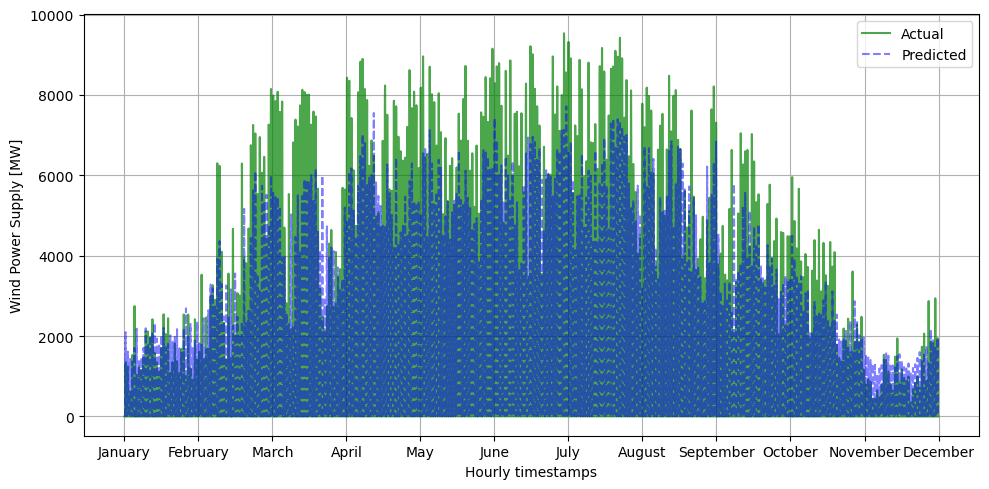

In [128]:
import matplotlib.pyplot as plt
def myrmse(y_true, y_pred):
    print("test")
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

y_pred = model.predict(X_test_scaled)
y_pred_24 = y_pred

indices = range(len(y_test))


y_test_first = y_test
y_pred_first = y_pred_24


months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]


hourly_ticks = np.linspace(0, len(y_test_first)-1, len(months))

plt.figure(figsize=(10,5))
plt.plot(indices,y_test_first, linestyle='-', color='g',alpha=0.7,  label='Actual')
plt.plot(indices,y_pred_first,  linestyle='--', color='blue',alpha=0.5,  label='Predicted')
plt.xlabel('Hourly timestamps')
plt.ylabel('Wind Power Supply [MW]')
plt.xticks(ticks=hourly_ticks, labels=months)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sun_power_supply_daily.png', dpi=300)
plt.show()